Covid-19 New Case Predictor
# Multiple Linear Regression Using sklearn

by Roya Salei

Course CS4200- Artificial Intelligence

Professor: Dr. Husain Zaidi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# read data from file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS4200-Predict-Covid-New-Cases/clean_state_ts.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
0,1.601942e+09,4,9,AK,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0,1565.0,1018.0,45.0,130.0,93.0,6.0,0,0.197712,0.000000,0.253518,0.000000
1,1.602029e+09,4,9,AK,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0,1565.0,1011.0,46.0,133.0,100.0,8.0,0,0.174532,0.001364,0.223795,0.001748
2,1.602115e+09,4,9,AK,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0,1569.0,1042.0,51.0,141.0,94.0,8.0,0,0.184076,0.001364,0.236034,0.001748
3,1.602202e+09,4,9,AK,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0,1604.0,1065.0,64.0,137.0,86.0,9.0,0,0.245435,0.000000,0.314712,0.000000
4,1.602288e+09,4,9,AK,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0,1604.0,969.0,54.0,137.0,89.0,9.0,0,0.342246,0.000000,0.438849,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21325,1.635984e+09,4,8,WY,537.0,104940.0,0.0,1243.0,81819.0,1028372.0,255655.0,1748.0,941.0,179.0,139.0,72.0,36.0,0,0.930916,0.000000,5.530381,0.000000
21326,1.636070e+09,4,8,WY,378.0,105318.0,0.0,1243.0,82057.0,1030728.0,256237.0,1748.0,923.0,181.0,139.0,76.0,36.0,0,0.655282,0.000000,3.892894,0.000000
21327,1.636157e+09,4,8,WY,0.0,105318.0,0.0,1243.0,82202.0,1032878.0,256695.0,1747.0,881.0,169.0,137.0,79.0,37.0,0,0.000000,0.000000,0.000000,0.000000
21328,1.636243e+09,4,8,WY,0.0,105318.0,0.0,1243.0,82344.0,1033805.0,256745.0,1747.0,881.0,175.0,137.0,78.0,41.0,0,0.000000,0.000000,0.000000,0.000000


## Section Two: Create Correlation Matrix

The purpose of this section is to find strongest relationships between covid new cases and the rest of features in the database

In [ ]:
# change state name to integer
states = df['state'].unique()
for i, j in enumerate(states):
    df['state'] = df['state'].replace(j, i)  
df

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install heatmapz

In [ ]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt

In [ ]:
corrMatrix = df.corr()
corrMatrix

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
date,1.000000,0.003970,0.006810,-0.007649,-0.064072,0.310931,-0.060395,0.252738,0.287809,0.286654,0.470248,-0.024236,0.003396,-0.056328,-0.022958,-0.006818,-0.008439,-0.497920,-0.073961,-0.086887,-0.030365,-0.063227
region,0.003970,1.000000,0.967099,-0.140144,0.016474,0.012722,0.027959,-0.123745,0.007251,-0.114125,-0.016441,-0.064025,-0.071269,0.016025,-0.058195,-0.016141,0.057001,-0.026600,0.054219,0.044683,-0.053163,-0.046300
division,0.006810,0.967099,1.000000,-0.139220,0.033490,0.042911,0.043931,-0.077512,0.030222,-0.083180,0.007740,-0.029412,-0.038197,0.039989,-0.025612,0.014091,0.084281,-0.018357,0.054741,0.043961,-0.091270,-0.078576
state,-0.007649,-0.140144,-0.139220,1.000000,-0.047624,-0.081540,-0.057411,-0.068543,-0.069388,-0.103734,-0.043598,-0.051185,-0.055686,-0.050456,-0.058224,-0.056546,-0.046126,0.028534,0.001504,-0.013710,-0.119321,-0.105105
newCases,-0.064072,0.016474,0.033490,-0.047624,1.000000,0.453739,0.659822,0.414256,0.464801,0.386245,0.205057,0.564956,0.586933,0.850749,0.588701,0.638759,0.815590,0.068908,0.508606,0.276803,0.067171,0.044745
cases,0.310931,0.012722,0.042911,-0.081540,0.453739,1.000000,0.469849,0.951005,0.986368,0.903142,0.841542,0.826489,0.847420,0.606931,0.830623,0.834002,0.629866,-0.118721,-0.032260,0.032311,-0.048489,-0.026817
newDeaths,-0.060395,0.027959,0.043931,-0.057411,0.659822,0.469849,1.000000,0.425416,0.478210,0.349536,0.174465,0.532878,0.550918,0.710850,0.550917,0.599843,0.709786,0.073074,0.277691,0.548223,0.026256,0.110165
deaths,0.252738,-0.123745,-0.077512,-0.068543,0.414256,0.951005,0.425416,1.000000,0.942334,0.915922,0.803852,0.857581,0.875293,0.569618,0.856179,0.828512,0.565303,-0.060849,-0.063806,0.011052,-0.030102,-0.011070
positiveTests,0.287809,0.007251,0.030222,-0.069388,0.464801,0.986368,0.478210,0.942334,1.000000,0.902459,0.823979,0.842628,0.864040,0.622869,0.840590,0.847351,0.641000,-0.108836,-0.030016,0.030407,-0.044675,-0.023049
negativeTests,0.286654,-0.114125,-0.083180,-0.103734,0.386245,0.903142,0.349536,0.915922,0.902459,1.000000,0.845351,0.753906,0.779377,0.487187,0.744744,0.714972,0.478208,-0.033260,-0.060932,-0.028677,-0.017632,-0.009965


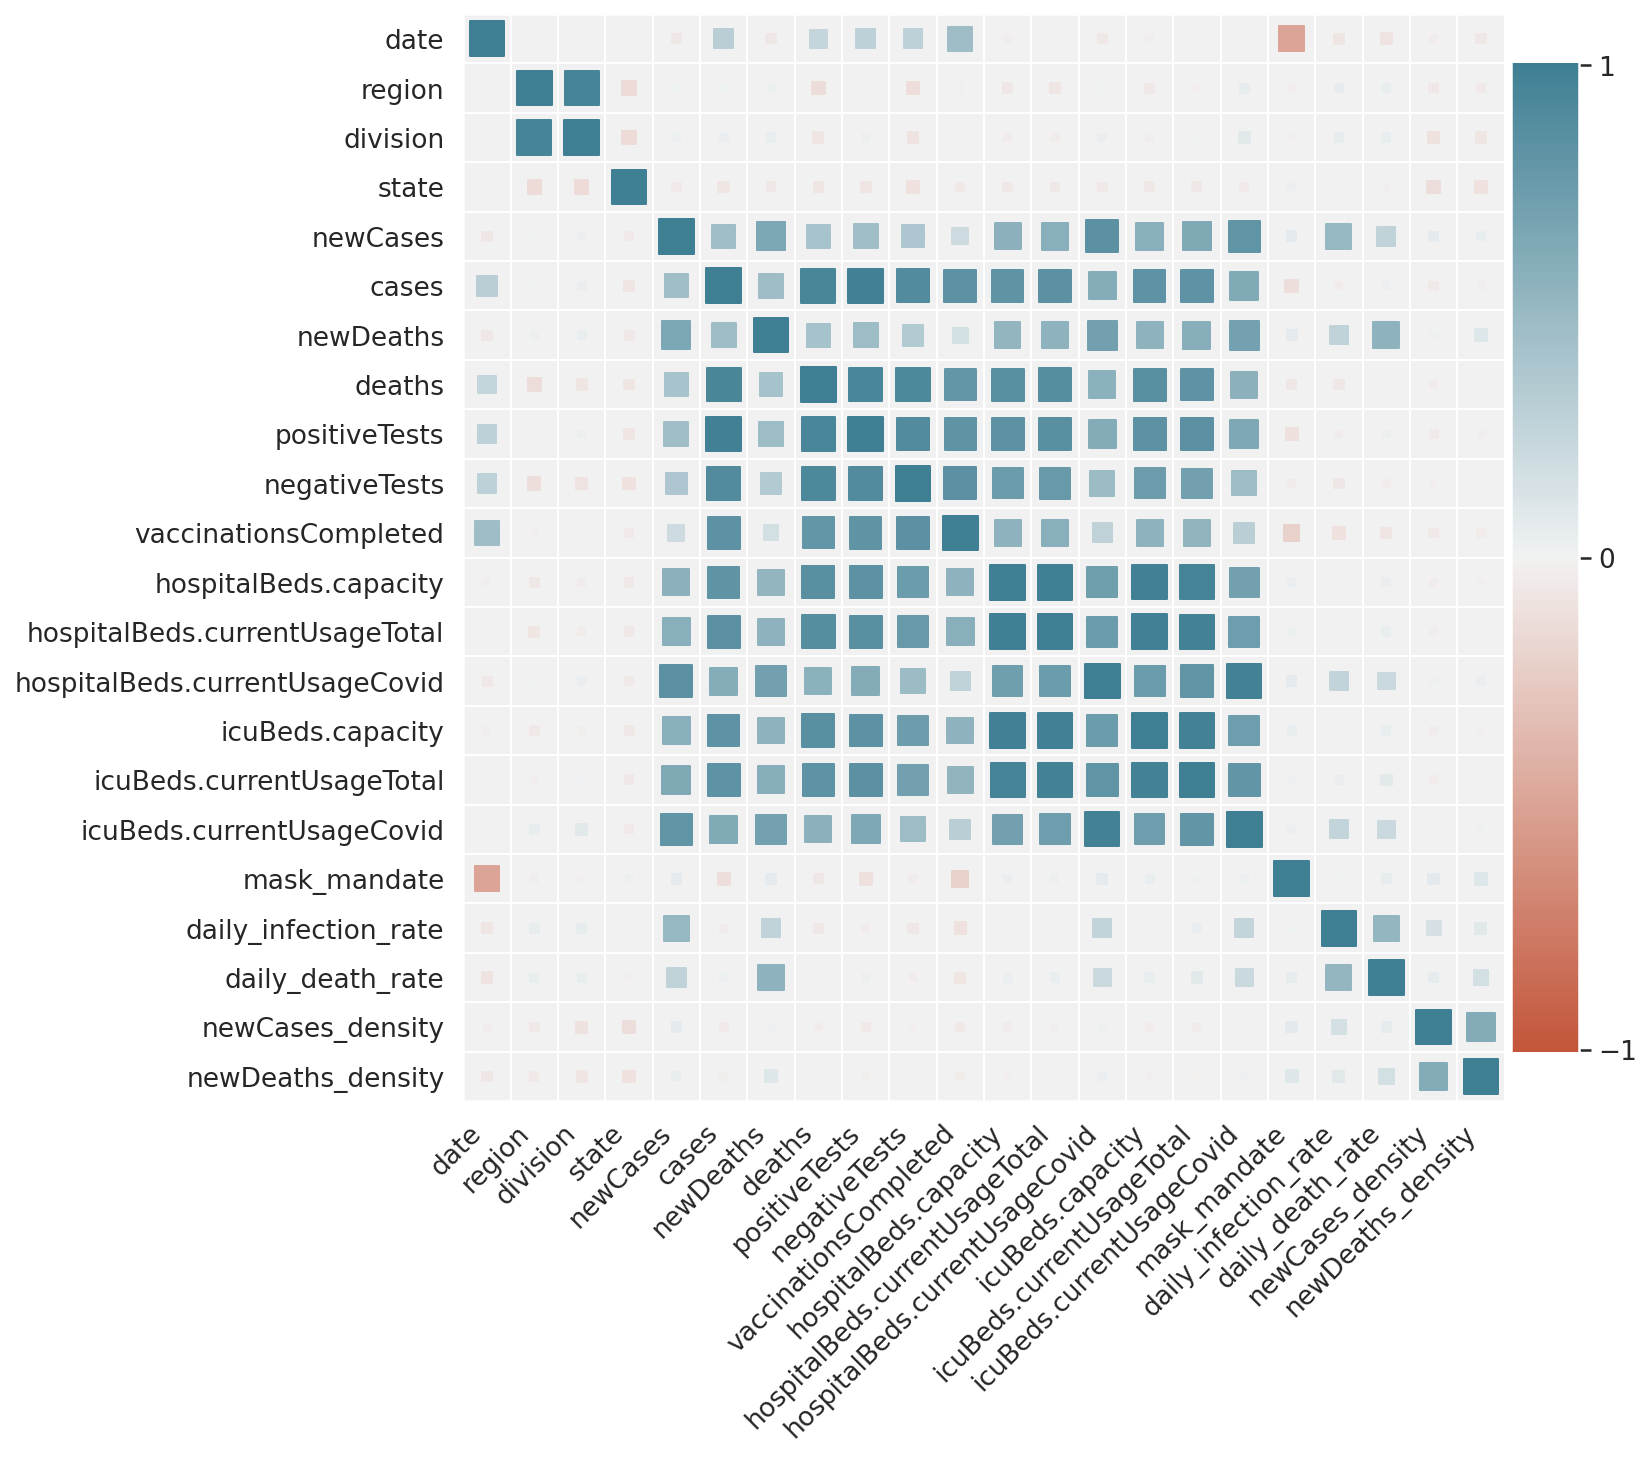

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Correlation Matrix for Covid Database Features")
corrplot(df.corr(), size_scale=300);

## Using Multiple Linear Regression to Predict Covid New Case Count

In [ ]:
df.info()
df. describe()

In [ ]:
features = ['date', 'region', 'division', 'state', 'cases', 'newDeaths',
       'deaths', 'positiveTests', 'negativeTests', 'vaccinationsCompleted',
       'hospitalBeds.capacity', 'hospitalBeds.currentUsageTotal',
       'hospitalBeds.currentUsageCovid', 'icuBeds.capacity',
       'icuBeds.currentUsageTotal', 'icuBeds.currentUsageCovid',
       'mask_mandate', 'daily_infection_rate', 'daily_death_rate',
       'newCases_density', 'newDeaths_density']

### Define x, y and spit data into train and test

In [ ]:
# convert feature_names to numpy array
x = df[features].to_numpy()
x = np.asarray(x).astype('float32')
# check type of feature_names to make sure it is all float32
type(x[0][0])  

numpy.float32

In [ ]:
from sklearn.model_selection import train_test_split

# get train and test groups based on feature (df[columns]) and  target (df['newCases])
X_train, X_test, y_train, y_test = train_test_split(x, df['newCases'], test_size = 0.3, random_state = 0)

In [ ]:
len(X_train)

14931

### Define the multiple linear regression model

In [ ]:
#define the multiple linear regression model
lin_reg = LinearRegression()

#fit the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'R-Squared : {lin_reg.score(X_test, y_test)}')

R-Squared : 0.7325632563538057


In [ ]:
#predict newCases with linear regression
y_predict = lin_reg.predict(X_test)
y_predict

array([ 356.18164,  420.32324,  291.2793 , ...,  655.16406, 1404.5605 ,
        203.96777], dtype=float32)

### Measure the accuracy of model

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_predict)
print('r2 socre is ',score)
print('mean_sqrd_error is =' , mean_squared_error(y_test,y_predict))
print('root_mean_squared error of is = ',np.sqrt(mean_squared_error(y_test,y_predict)))

r2 socre is  0.7325632563538057
mean_sqrd_error is = 3229332.341880982
root_mean_squared error of is =  1797.0343185039571


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


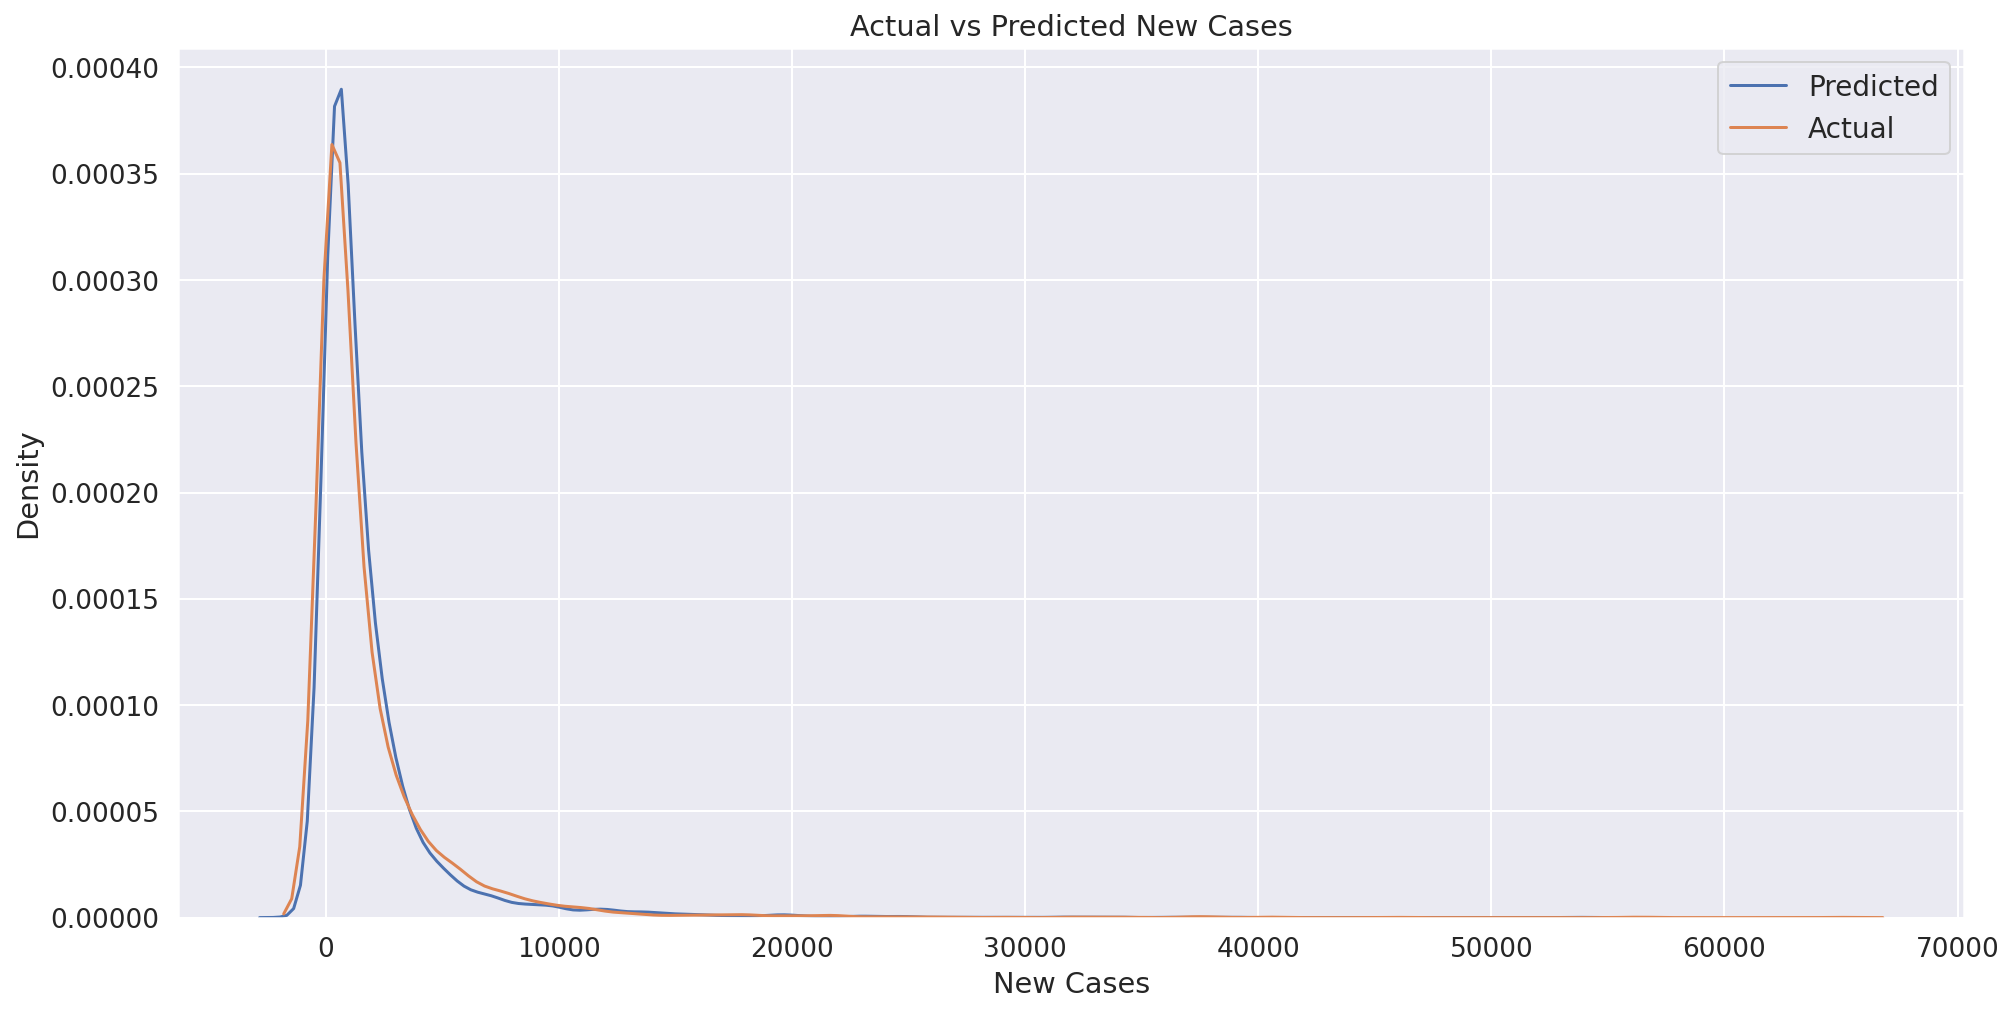

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
outcome = 'New Cases'
plt.figure(figsize=(16,8))
sns.distplot(y_predict, hist = False, label = f'Predicted {outcome}')
sns.distplot(y_test, hist = False, label = f'Actual {outcome}')

plt.title(f'Actual vs Predicted {outcome}')
plt.xlabel(outcome)
plt.ylabel('Density')
plt.legend(['Predicted', 'Actual'],loc=1,fontsize=14)
plt.show()

## Repeated the model with less features

In [ ]:
#removed features with least correlations, also cases, death cases, and infection rate and density
col2 = ['date', 'state', 'positiveTests', 'negativeTests', 'vaccinationsCompleted',
       'hospitalBeds.capacity', 'hospitalBeds.currentUsageTotal',
       'hospitalBeds.currentUsageCovid', 'icuBeds.capacity',
       'icuBeds.currentUsageTotal', 'icuBeds.currentUsageCovid',
       'mask_mandate']

In [ ]:
# convert feature_names to numpy array
x = df[col2].to_numpy()
x = np.asarray(x).astype('float32')
# check type of feature_names to make sure it is all float32
type(x[0][0])  

numpy.float32

In [ ]:
# get train and test groups based on feature (df[columns]) and  target (df['newCases])
X_train, X_test, y_train, y_test = train_test_split(x, df['newCases'], test_size = 0.3, random_state = 0)

In [ ]:
#define the multiple linear regression model
lin_reg = LinearRegression()

#fit the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'R-Squared : {lin_reg.score(X_test, y_test)}')

R-Squared : 0.7105661728193167


In [ ]:
#predict newCases with linear regression
y_predict = lin_reg.predict(X_test)
y_predict

array([503.22388 , 480.06433 , -23.686096, ..., 360.5249  , 419.52087 ,
       350.4463  ], dtype=float32)

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_predict)
print('r2 socre is ',score)
print('mean_sqrd_error is =' , mean_squared_error(y_test,y_predict))
print('root_mean_squared error of is = ',np.sqrt(mean_squared_error(y_test,y_predict)))

r2 socre is  0.7105661728193167
mean_sqrd_error is = 3494949.8943402655
root_mean_squared error of is =  1869.4785086596385


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


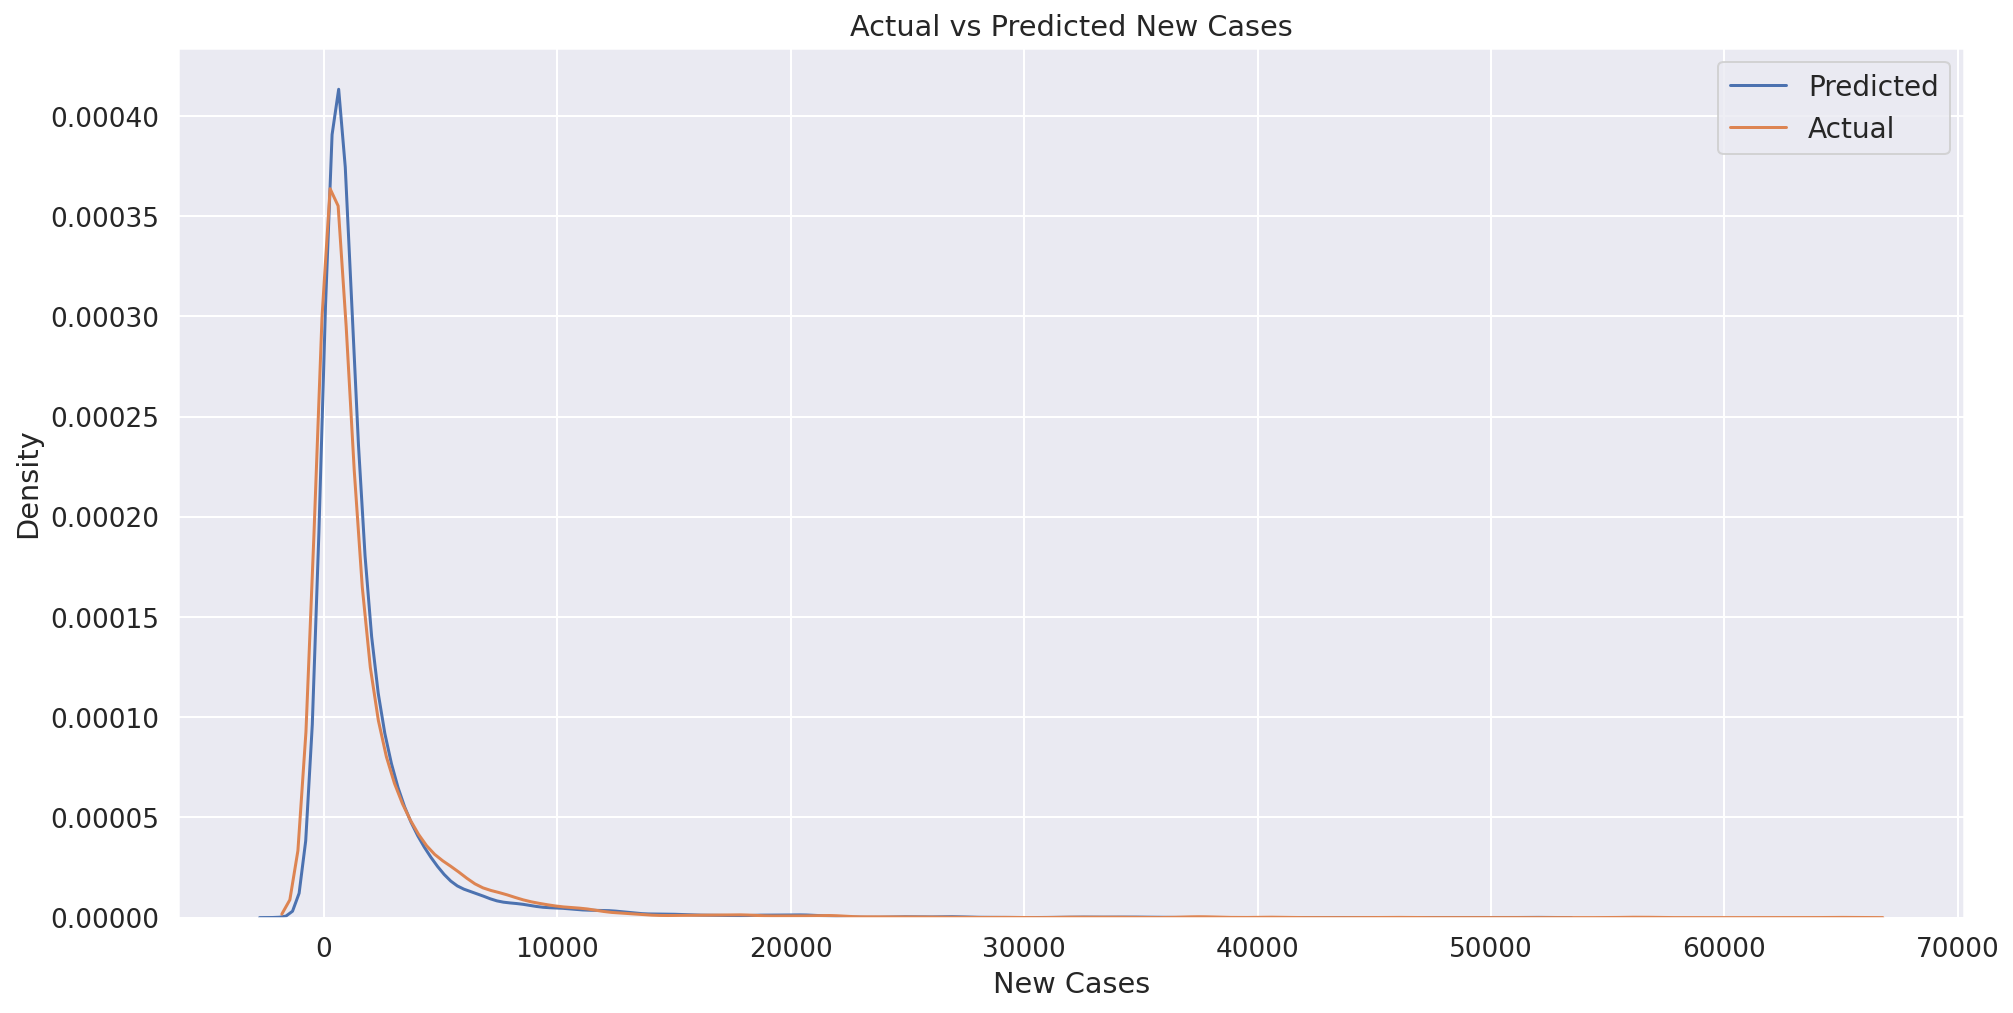

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
outcome = 'New Cases'
plt.figure(figsize=(16,8))
sns.distplot(y_predict, hist = False, label = f'Predicted {outcome}')
sns.distplot(y_test, hist = False, label = f'Actual {outcome}')

plt.title(f'Actual vs Predicted {outcome}')
plt.xlabel(outcome)
plt.ylabel('Density')
plt.legend(['Predicted', 'Actual'],loc=1,fontsize=14)
plt.show()